# Credit Card customers (EDA)


## **Задание 1**
## Поля датасета:
### • CLIENTNUM: ID клиента

### • Attrition_Flag: Активность Клиента. Если учетная запись больше не существует, то «Attrited Customer», иначе «Existing Customer»

### • Customer_Age: Возраст

### • Gender: Пол

### • Dependent_count: Количество иждивенцев

### • Education_Level: Уровень образования: Graduate, High School, Unknown, Uneducated, College, Post-Graduate, Doctorate.

### • Marital_Status: Семейное положение пользователя

### • Income_Category: Годовой доход владельца счета

### • Card_Category: Тип карты

### • Months_on_book: Период сотрудничества с банком

### • Total_Relationship_Count: Количество продукции, принадлежащей покупателю

### • Months_Inactive_12_mon: Количество месяцев неактивности за последние 2 месяца

### • Contacts_Count_12_mon: Количество контактов между клиентом и банком за последние 12 месяцев

### • Credit_Limit: Лимит кредитной карты

### • Total_Revolving_Bal: Остаток, который переносится с одного месяца на другой, является возобновляемым балансом

### • Avg_Open_To_Buy: Сумма оставшаяся на кредитной карте для использования

### • Total_Trans_Amt: Общая сумма транзакций (за последние 12 месяцев)

### • Total_Trans_Ct: Количество транзакций (за последние 12 месяцев)

### • Total_Ct_Chng_Q4_Q1: Соотношение общего количества транзакций в 4-м квартале и общего количества транзакций в 1-м квартале

### • Total_Amt_Chng_Q4_Q1: Соотношение общей суммы сделки в 4 квартале и общей суммы сделки в 1 квартале

### • Avg_Utilization_Ratio: Показывает, какую часть доступного кредита потратил клиент

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling

In [5]:
pd.set_option('display.max_columns', None)

In [52]:
# Загрузка датасета
df = pd.read_csv('BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


## **Задание 2**

In [8]:
# Просмотр столбцов
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [9]:
# Удалим ненужные столбцы
df = df.drop(['CLIENTNUM',
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis = 1)

In [10]:
# Информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [11]:
# Статистическая информация о датасете
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [12]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [13]:
# Количество нулевых значений в датасете
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## **Задание 3**

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


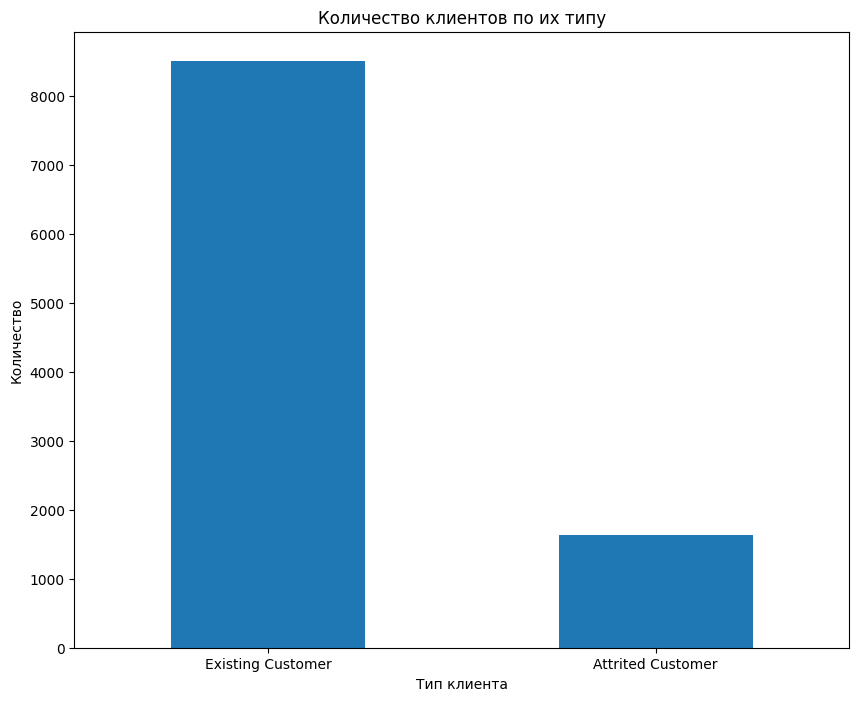

In [18]:
print(df['Attrition_Flag'].value_counts())
plt.figure(figsize=(10,8))
df['Attrition_Flag'].value_counts().plot(kind='bar')
plt.title('Количество клиентов по их типу')
plt.xlabel('Тип клиента')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

# Из данной визуализации видно, что существующих клиентов намного больше потерянных

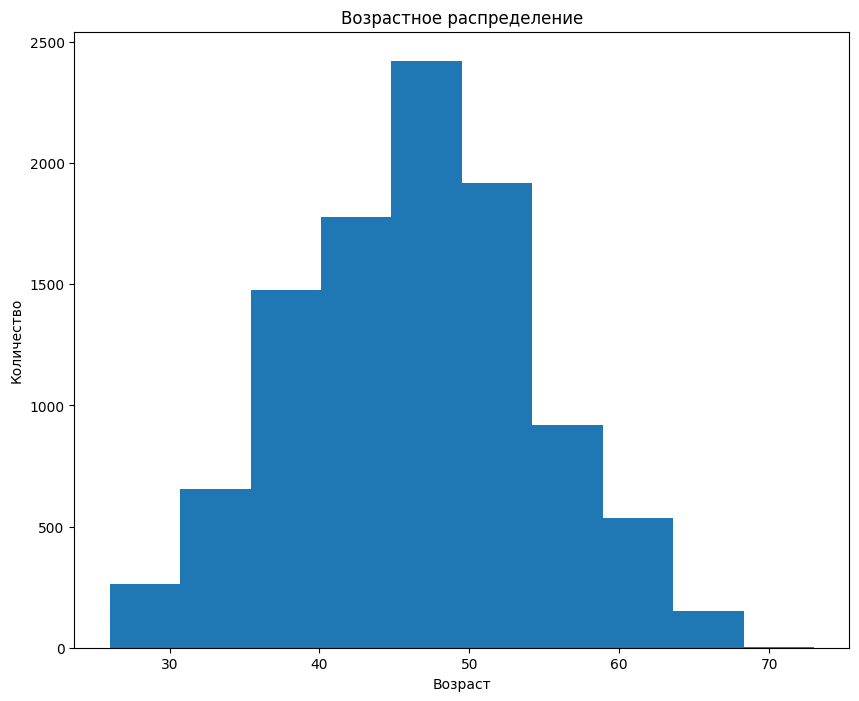

In [20]:
plt.figure(figsize=(10, 8))
df['Customer_Age'].plot(kind='hist')
plt.title('Возрастное распределение')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

# Из данной визуализации видно, что средний возраст клиентов от 45 до 55 лет

F    5358
M    4769
Name: Gender, dtype: int64


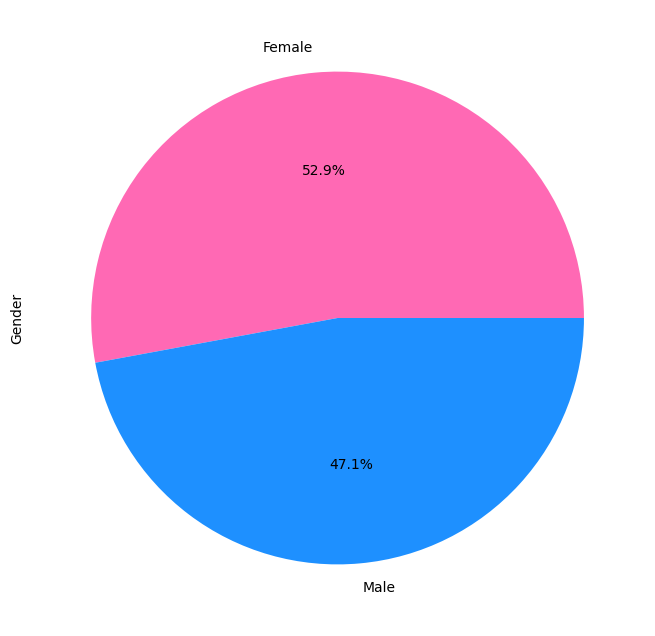

In [23]:
print(df['Gender'].value_counts())
plt.figure(figsize=(10, 8))
colors = ('#FF69B4', '#1E90FF')
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = colors, label='Gender', labels=['Female', 'Male'])
plt.show()

# Здесь видно, что женщин больше, но не намного

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


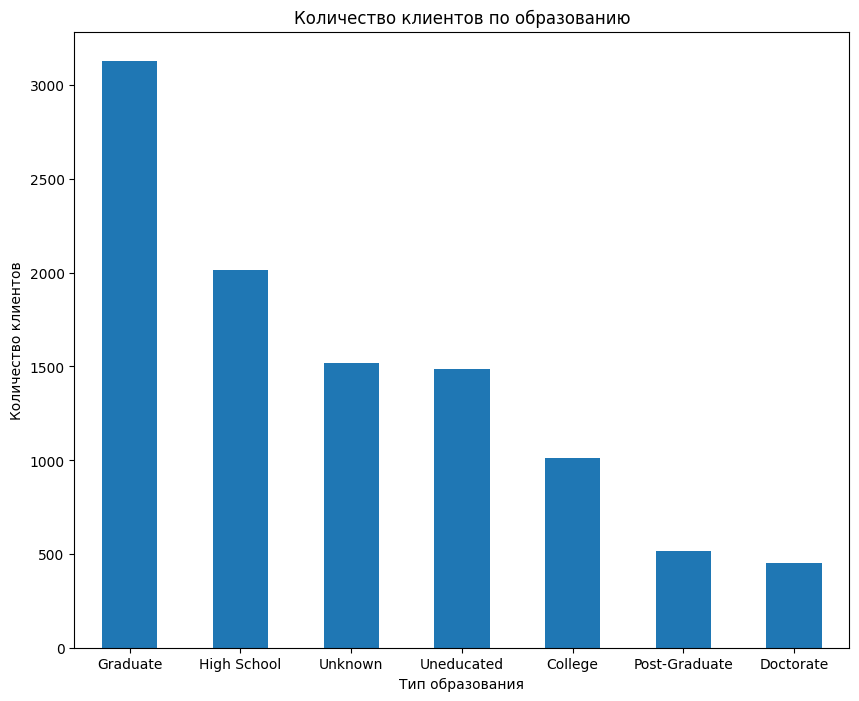

In [26]:
print(df['Education_Level'].value_counts())
plt.figure(figsize=(10, 8))
df['Education_Level'].value_counts().plot(kind='bar')
plt.title('Количество клиентов по образованию')
plt.xlabel('Тип образования')
plt.xticks(rotation=0)
plt.ylabel('Количество клиентов')
plt.show()

# По визуализации видно, что преобладает количество выпускников

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64


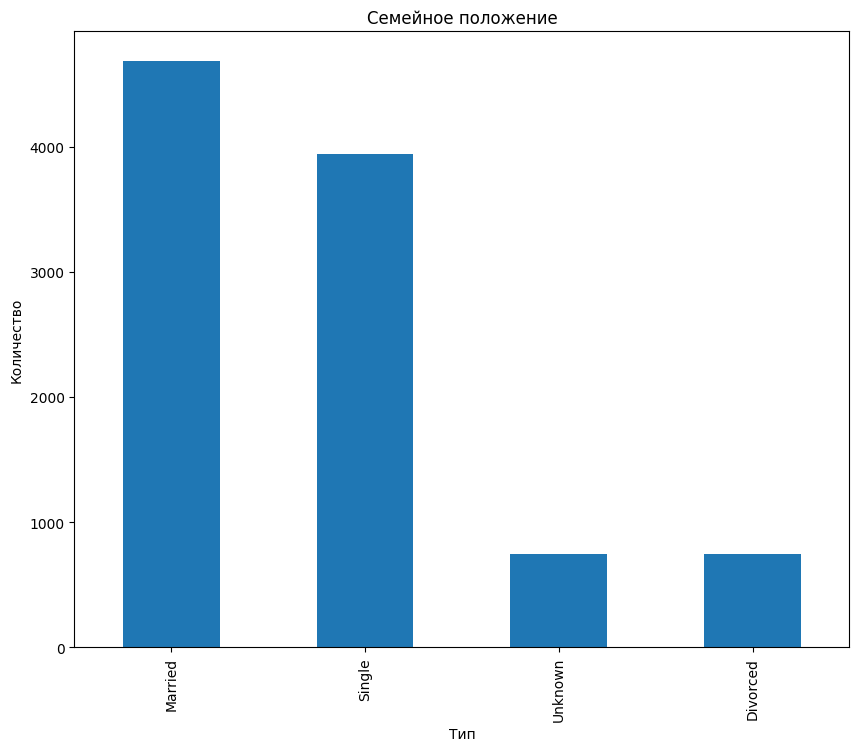

In [27]:
print(df['Marital_Status'].value_counts())
plt.figure(figsize=(10, 8))
df['Marital_Status'].value_counts().plot(kind='bar')
plt.title('Семейное положение')
plt.xlabel('Тип')
plt.ylabel('Количество')
plt.show()

# По графику видно, что больше клиентов, которые находятся в браке, но и не мало одиночек

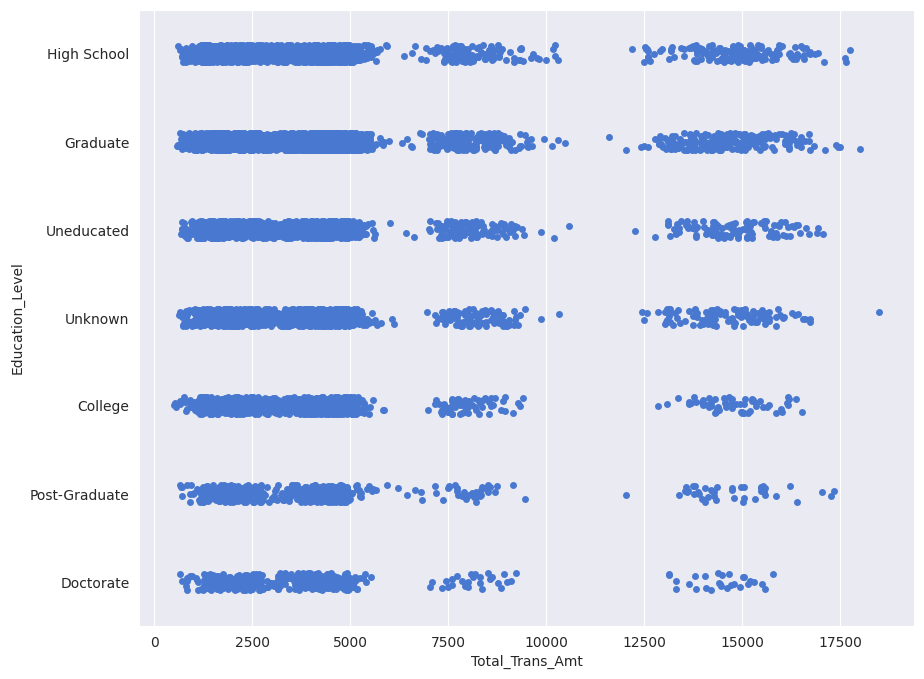

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.stripplot(data = df, x = 'Total_Trans_Amt', y = 'Education_Level')
plt.show()

# На данной визуализации видно, что есть разрывы в общей сумме транзакции между 5000–7000 и 10000–12500 для клиентов всех уровней образования

Average Transaction Amount : 4404.086303939963


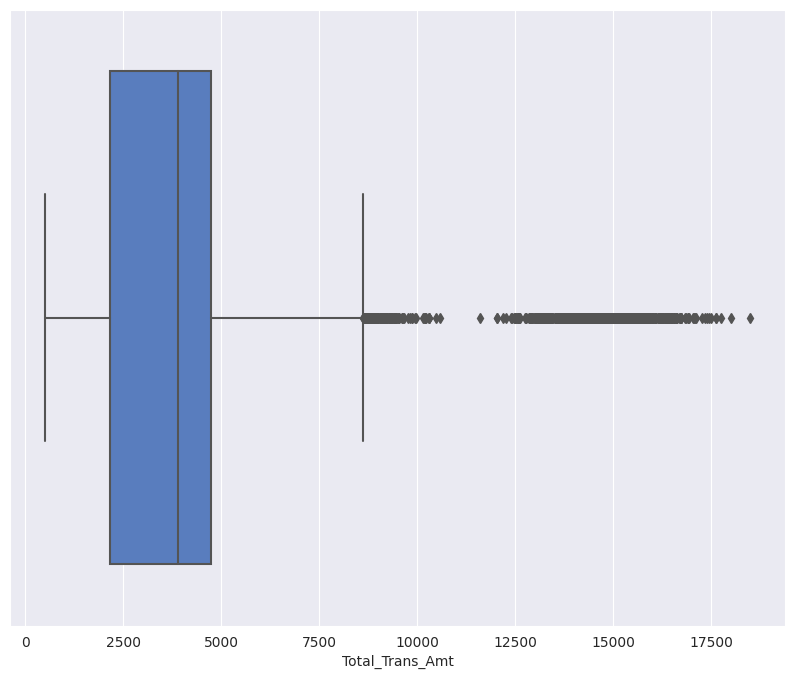

In [35]:
print("Average Transaction Amount : {}".format(df.Total_Trans_Amt.mean()))
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x = "Total_Trans_Amt")
plt.show()

# Визуализация boxplot. Здесь видно 2 разрыва, а также среднее значение и медианное

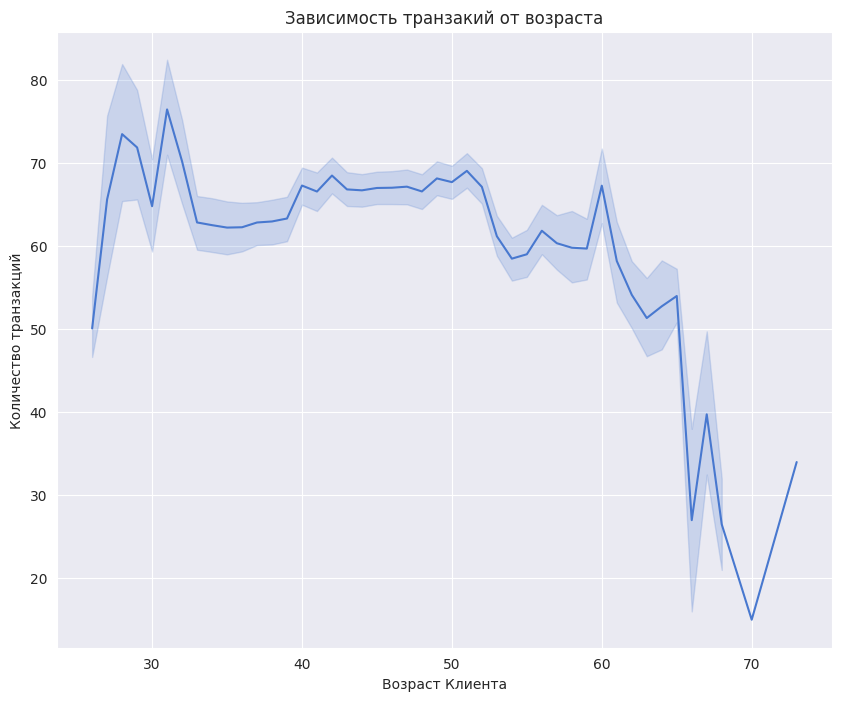

In [38]:
plt.figure(figsize=(10,8))
sns.lineplot(data = df, x = 'Customer_Age', y = 'Total_Trans_Ct')
plt.title('Зависимость транзакий от возраста')
plt.xlabel('Возраст Клиента')
plt.ylabel('Количество транзакций')
plt.show()

# В данной визуализации видно, что после 60 лет количество транзакций снижается, в диапазоне возраста 25-35 лет количество транзакций находится на пике

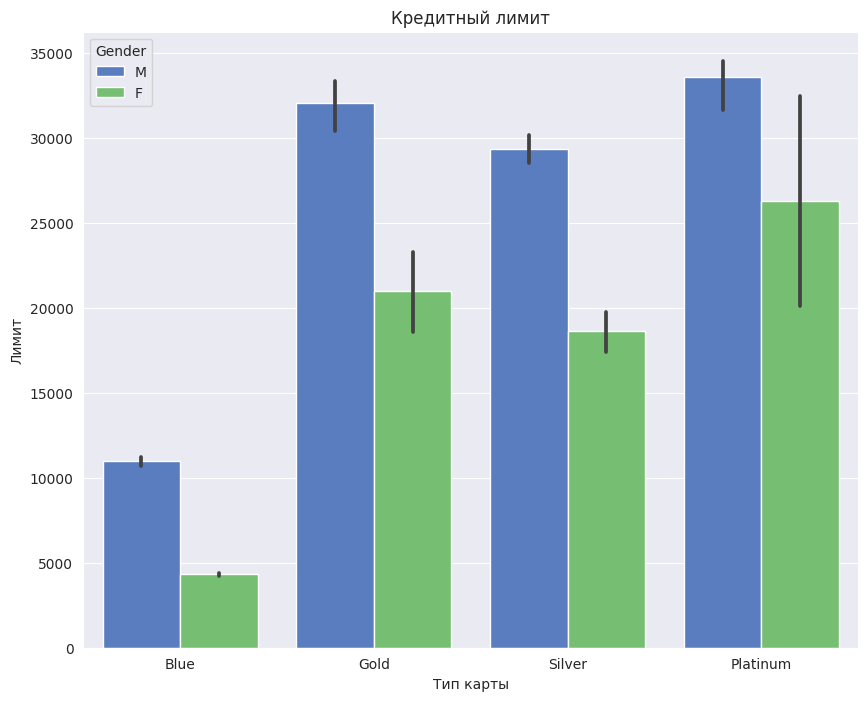

In [45]:
plt.figure(figsize=(10,8))
sns.barplot(data = df,x = 'Card_Category',y = 'Credit_Limit',hue = 'Gender')
plt.title('Кредитный лимит')
plt.xlabel('Тип карты')
plt.ylabel('Лимит')
plt.show()

# На платиновой карте лимит гораздо больше, по сравнению с синей картой
# А также кредитный лимит меньше для женщин

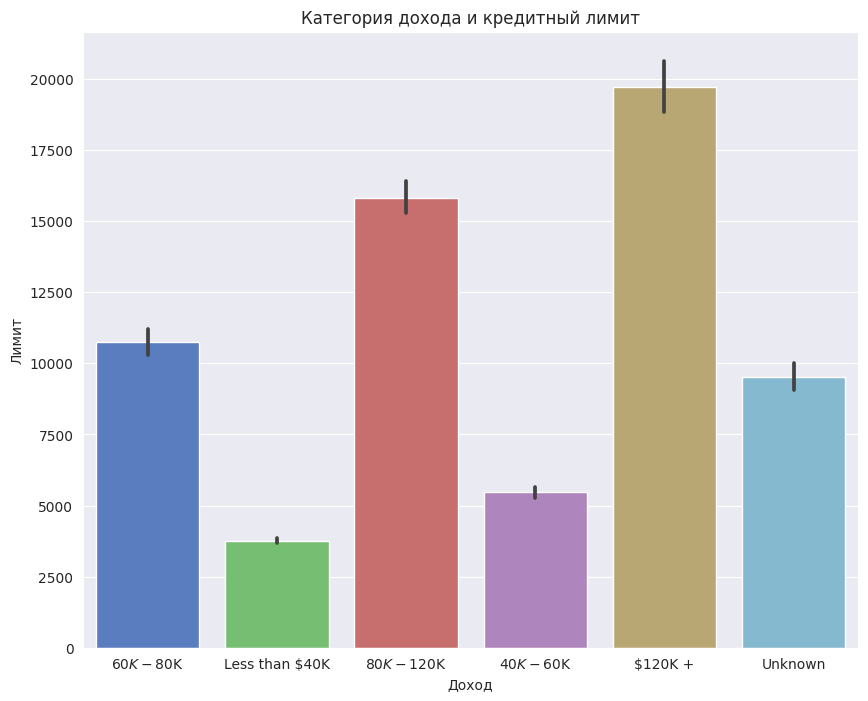

In [46]:
plt.figure(figsize=(10,8))
sns.barplot(data = df,x = 'Income_Category',y = 'Credit_Limit')
plt.title('Категория дохода и кредитный лимит')
plt.xlabel('Доход')
plt.ylabel('Лимит')
plt.show()

# Видно, что кредит выдают больше тем, у кого доход больше, что логично

## **Задание 4**

In [39]:
# Кореляционная матрица
df.corr()

<ipython-input-39-8211524bc72c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


1) Customer_Age имеет положительную корреляцию с Months_on_book (0.789), что означает, что клиенты, которые старшер - склонны к долгосрочным отношениям с банком.

2) Total_Relationship_Count имеет сильную отрицательную корреляцию с Total_Trans_Amt (-0.347) и Total_Trans_Ct (-0.242), это говорит о том, что клиенты с большим количеством отношений с банком чаще совершают меньше транзакций.

3) Credit_Limit сильно коррелирует с Avg_Open_To_Buy (0.996), оба признака описывают доступный кредитный лимит клиента.

4) Total_Revolving_Bal имеет высокую корреляцию с Avg_Utilization_Ratio (0.624), что может указывать на то, что баланс, который клиент оставил на кредитной карте, связан с тем, как он использует кредит (процент использования).

5) Total_Trans_Amt сильно коррелирует с Total_Trans_Ct (0.807), что говорит о том, что сумма транзакций и количество транзакций сильно связаны.

## **Задание 5**

In [42]:
# pandas-profiling
ydata_profiling .ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

Библиотека pandas-profiling помогла мне лучше понять датасет, так как он подробно описал каждую характеристику и ее зависимости. Я увидела здесь проверка на пропущенные значения, корреляционную матрицу, различные зависимости. Эта библиотека позволила мне не строить другие визуализации.

## **Задание 6**

Визуализации, которые можно было еще построить:
1.   Временной анализ
2.   Анализ клиентской активности

Вопросы по датасету:
1.   Какие факторы наиболее сильно влияют на отток клиентов?
2.   Существует ли зависимость между уровнем образования и типом карт?
3.   Какие стратегии удержания клиентов могли бы быть эффективными?
4.   Какие факторы сильно коррелируют между собой?

Впоросы для бизнес-заказчика:
1.   Какие изменения в активности клиентов с течением времени могут быть замечены?
2.   Какой процент клиентов считается активными, а какой - ушедшими?
3.   Какие факторы наиболее сильно связаны с оттоком клиентов?
4.   Каковы средний возраст и доход клиентов?

Дополнительные данные:
1.   Демографические данные, такие как местоположение клиента и профессия
2.   Информация о транзакциях на других банковских счетах

Обобщение: анализ набора данных может помочь банку лучше понимать поведение своих клиентов, выявлять факторы, влияющие на отток. Благодаря этому банк сможет разрабатывать стратегии удержания клиентов для увеличения прибыли и улучшения обслуживания.







